In [2]:
!pip install PyWavelets==0.5.2
# opencv-python==3.4.3.18
# seaborn==0.8.1

  Created wheel for PyWavelets: filename=PyWavelets-0.5.2-cp38-cp38-win_amd64.whl size=4182692 sha256=de42087b9b378ee9243f340064b0d2b810e195203081977fe85ddcaa900704a6
  Stored in directory: c:\users\khatr\appdata\local\pip\cache\wheels\8f\e7\f7\21e83281c6f16c46b10400b77a7f730409827cd6329e1df217
Successfully built PyWavelets
  Attempting uninstall: PyWavelets
    Found existing installation: PyWavelets 1.1.1
    Uninstalling PyWavelets-1.1.1:
      Successfully uninstalled PyWavelets-1.1.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.18.1 requires PyWavelets>=1.1.1, but you have pywavelets 0.5.2 which is incompatible.


In [4]:
!pip install opencv-python

In [6]:
!pip install seaborn==0.8.1

  Created wheel for seaborn: filename=seaborn-0.8.1-py3-none-any.whl size=184833 sha256=70a117e1b78b893d0fe05d12e7f8c9831be4c0cf59d739f6777a4b63cd1d4de7
  Stored in directory: c:\users\khatr\appdata\local\pip\cache\wheels\18\48\9b\39ac10dbe8ed3a4883283aed441a765239b3cc7c94ed5a2040
Successfully built seaborn
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [7]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
img = cv2.imread('./test_images/Maria Sharapova (Tennis Player) - On....jpg')
img.shape

(450, 360, 3)

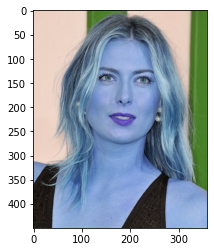

In [9]:
plt.imshow(img)

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(450, 360)

In [14]:
gray

array([[208, 208, 208, ...,  92,  92,  92],
       [208, 208, 208, ...,  92,  92,  92],
       [207, 207, 207, ...,  92,  92,  92],
       ...,
       [ 28,  27,  25, ..., 186, 190, 190],
       [ 30,  25,  24, ..., 191, 189, 189],
       [ 29,  25,  22, ..., 190, 189, 189]], dtype=uint8)

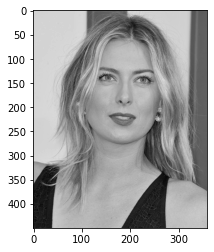

In [15]:
plt.imshow(gray, cmap='gray')

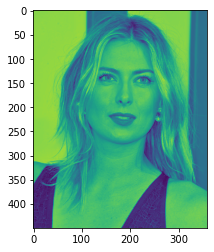

In [16]:
plt.imshow(gray)

In [30]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/khatr/Downloads/jupitor_notebook/project/Image_classification_sports/opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[100,  71, 179, 179]], dtype=int32)

In [31]:
x,y,w,h = faces[0]
x,y,w,h

(100, 71, 179, 179)

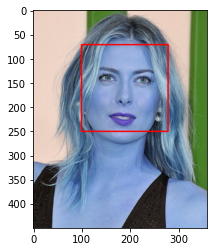

In [32]:
face_img = cv2.rectangle(img, (x,y), (x+w, y+h), (255,0,0),2)
plt.imshow(face_img)

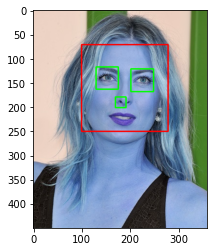

In [33]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

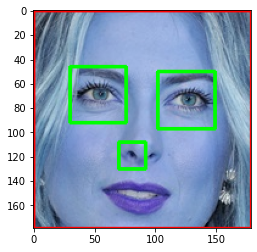

In [34]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [40]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

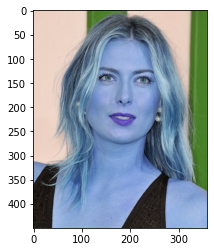

In [36]:
original_image = cv2.imread('./test_images/Maria Sharapova (Tennis Player) - On....jpg')
plt.imshow(original_image)

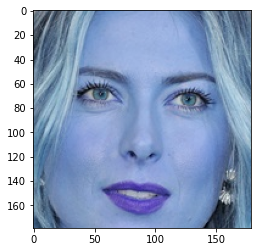

In [41]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/Maria Sharapova (Tennis Player) - On....jpg')
plt.imshow(cropped_image)

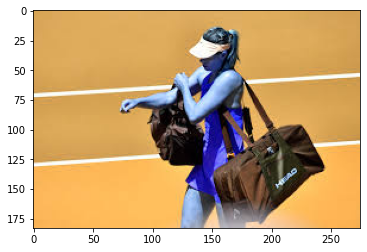

In [43]:
org_image_obstructed = cv2.imread('./test_images/images.jpg')
plt.imshow(org_image_obstructed)

In [44]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/images.jpg')
cropped_image_no_2_eyes

## Wavelet transform

In [67]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

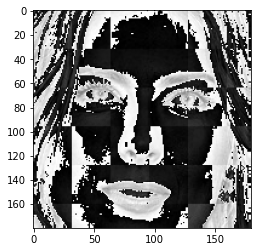

In [69]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [45]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [46]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)
        

In [47]:
img_dirs

['./dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [52]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)


In [64]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        try:
            roi_color = get_cropped_image_if_2_eyes(entry.path)
        except:pass
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.mkdir(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print('Generating cropped images in folder: ', cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + '/' + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
                
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1
    

lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [65]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi24.png',
  './dataset/cropped/lionel_messi\

In [66]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

#### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images
#### to train our classifier. Let's prepare X and y now

In [70]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])   

In [98]:
32*32*3 + 32*32

4096

In [103]:
X[0].shape

(4096,)

In [73]:
y[0]

0

In [74]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(189, 4096)

In [75]:
# We will use SVM with rbf kernel tuned with heuristic finetuning

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8541666666666666

In [83]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       1.00      0.90      0.95        10
           2       0.86      1.00      0.92         6
           3       1.00      0.75      0.86         8
           4       0.78      1.00      0.88        14

    accuracy                           0.85        48
   macro avg       0.88      0.85      0.85        48
weighted avg       0.87      0.85      0.85        48



In [84]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [85]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [86]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.681034,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.489163,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.688177,{'logisticregression__C': 1}
